In [1]:
# importing the needed libraries

import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [2]:
df = pd.read_csv("C://Users//quays//Desktop//CO2 emissions data.csv") # loading the csv dataset

In [3]:
df.head() # displaying the top 5 rows of the dataset

Make       Model Vehicle Class  Engine Size(L)  Cylinders  \
0  ACURA         ILX       COMPACT             2.0          4   
1  ACURA         ILX       COMPACT             2.4          4   
2  ACURA  ILX HYBRID       COMPACT             1.5          4   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6   

                   Transmission         Fuel Type  \
0  Automatic with select shift5  Premium Gasoline   
1                       Manual6  Premium Gasoline   
2        Continuously variable7  Premium Gasoline   
3  Automatic with select shift6  Premium Gasoline   
4  Automatic with select shift6  Premium Gasoline   

   Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
0                               9.9                              6.7   
1                              11.2                              7.7   
2                               6.0                              5.8   
3                              12.7                              9.1   
4                              12.1                              8.7   

   Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
0                               8.5                           33   
1                               9.6                           29   
2                               5.9                           48   
3                              11.1                           25   
4                              10.6                           27   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244

In [4]:
df.tail()  # displaying the down 5 rows of the dataset

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
6277  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
6278  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
6279  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
6280  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
6281  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

                      Transmission         Fuel Type  \
6277  Automatic with select shift8  Premium Gasoline   
6278  Automatic with select shift8  Premium Gasoline   
6279  Automatic with select shift8  Premium Gasoline   
6280  Automatic with select shift8  Premium Gasoline   
6281  Automatic with select shift8  Premium Gasoline   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
6277                              10.7                              7.7   
6278                              11.2                              8.3   
6279                              11.7                              8.6   
6280                              11.2                              8.3   
6281                              12.2                              8.7   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
6277                               9.4                           30   
6278                               9.9                           29   
6279                              10.3                           27   
6280                               9.9                           29   
6281                              10.7                           26   

      CO2 Emissions(g/km)  
6277                  219  
6278                  232  
6279                  240  
6280                  232  
6281                  248

# EXPLORATORY DATA ANALYSIS (E.D.A)




In [5]:
((df.isnull().sum()) / len(df)) * 100 # checking for percentage null, nan, N/A values in the dataset

Make                                0.0
Model                               0.0
Vehicle Class                       0.0
Engine Size(L)                      0.0
Cylinders                           0.0
Transmission                        0.0
Fuel Type                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
Fuel Consumption Comb (mpg)         0.0
CO2 Emissions(g/km)                 0.0
dtype: float64

In [6]:
df.dtypes # checking for the data types of the columns

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [7]:
df.describe(include = 'all') # making an initial statistical description of the data

Make      Model Vehicle Class  Engine Size(L)    Cylinders  \
count   6282       6282          6282     6282.000000  6282.000000   
unique    42       2053            16             NaN          NaN   
top     FORD  F-150 FFV   SUV - SMALL             NaN          NaN   
freq     577         32          1006             NaN          NaN   
mean     NaN        NaN           NaN        3.161812     5.618911   
std      NaN        NaN           NaN        1.365201     1.846250   
min      NaN        NaN           NaN        0.900000     3.000000   
25%      NaN        NaN           NaN        2.000000     4.000000   
50%      NaN        NaN           NaN        3.000000     6.000000   
75%      NaN        NaN           NaN        3.700000     6.000000   
max      NaN        NaN           NaN        8.400000    16.000000   

                        Transmission         Fuel Type  \
count                           6282              6282   
unique                            27                 5   
top     Automatic with select shift6  Regular Gasoline   
freq                            1139              3039   
mean                             NaN               NaN   
std                              NaN               NaN   
min                              NaN               NaN   
25%                              NaN               NaN   
50%                              NaN               NaN   
75%                              NaN               NaN   
max                              NaN               NaN   

        Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
count                        6282.000000                      6282.000000   
unique                               NaN                              NaN   
top                                  NaN                              NaN   
freq                                 NaN                              NaN   
mean                           12.610220                         9.070583   
std                             3.553066                         2.278884   
min                             4.200000                         4.000000   
25%                            10.100000                         7.500000   
50%                            12.100000                         8.700000   
75%                            14.700000                        10.300000   
max                            30.600000                        20.600000   

        Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
count                        6282.000000                  6282.000000   
unique                               NaN                          NaN   
top                                  NaN                          NaN   
freq                                 NaN                          NaN   
mean                           11.017876                    27.411016   
std                             2.946876                     7.245318   
min                             4.100000                    11.000000   
25%                             8.900000                    22.000000   
50%                            10.600000                    27.000000   
75%                            12.700000                    32.000000   
max                            26.100000                    69.000000   

        CO2 Emissions(g/km)  
count           6282.000000  
unique                  NaN  
top                     NaN  
freq                    NaN  
mean             251.157752  
std               59.290426  
min               96.000000  
25%              208.000000  
50%              246.000000  
75%              289.000000  
max              522.000000

In [8]:
df.nunique() # checking for the total number of unique values in each field or column

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [9]:
df.shape # checking for the shape of the data, (rows, columns)

(6282, 12)

In [10]:
df.duplicated().sum() # checking for the sum of the duplicated rows in the data

0

In [11]:
df.drop_duplicates(inplace = True)  # dropping the duplicated values or rows in the dataset

In [12]:
df.columns.tolist() # viewing the columns in to list format

['Make',
 'Model',
 'Vehicle Class',
 'Engine Size(L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)']

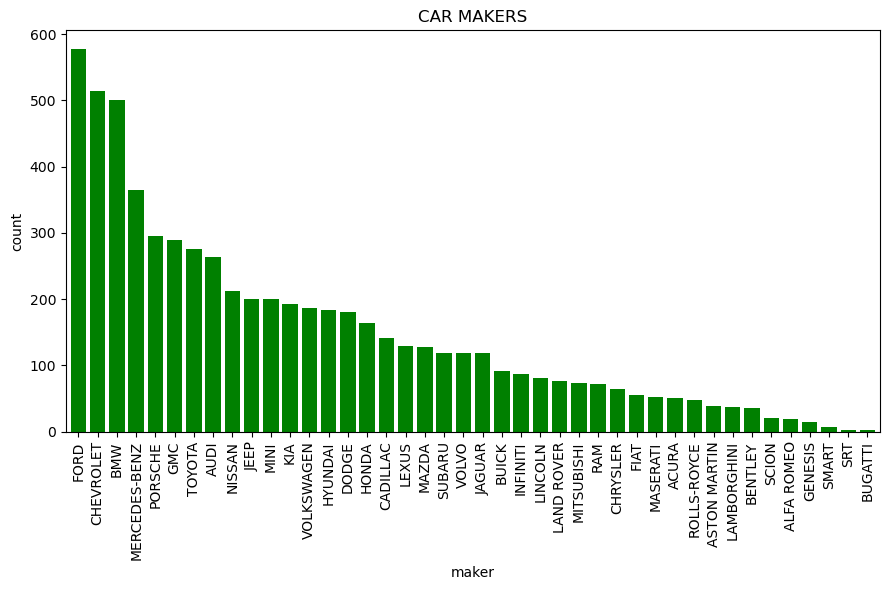

In [13]:
# bar plot of car makers and the car counts

plt.figure(figsize = (9, 6))
value_counts = df['Make'].value_counts()
plot = value_counts.sort_values(ascending = False)
plot.plot(kind = 'bar', width = 0.8, color = 'green')
plt.xlabel('maker', color = 'black')
plt.ylabel('count', color = 'black')
plt.title('CAR MAKERS', color = 'black')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

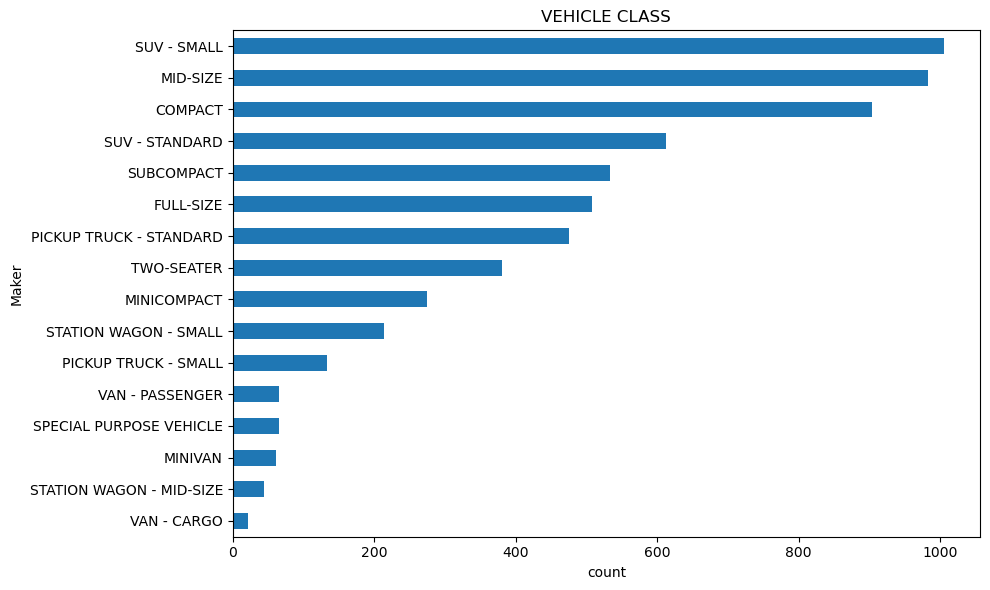

In [14]:
# bar plot of vehicle class and the vehicle counts

plt.figure(figsize = (10, 6))
value_counts = df['Vehicle Class'].value_counts()
plot = value_counts.sort_values(ascending = True)
plot.plot(kind = 'barh')
plt.xlabel('count', color = 'black')
plt.ylabel('Maker', color = 'black')
plt.title('VEHICLE CLASS', color = 'black')
plt.tight_layout()
plt.show()

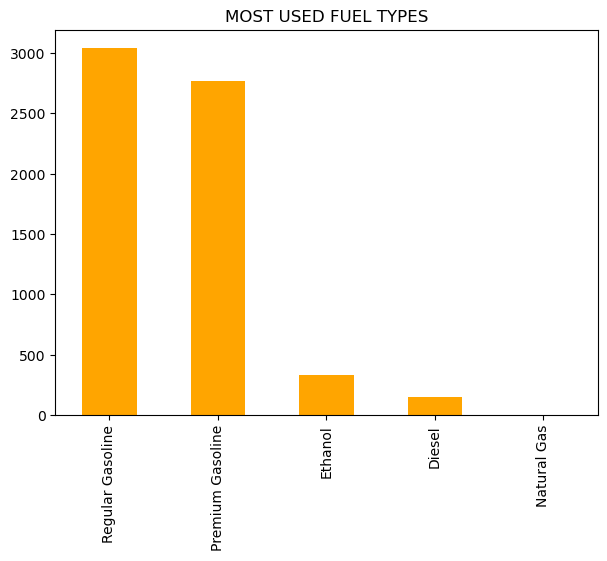

In [15]:
# bar chart of the fuel types

plt.figure(figsize = (7, 5))
value_counts = df['Fuel Type'].value_counts()
plot = value_counts.sort_values(ascending = False)
plot.plot(kind = 'bar', color = 'orange')
plt.title('MOST USED FUEL TYPES', color = 'black')
plt.show()

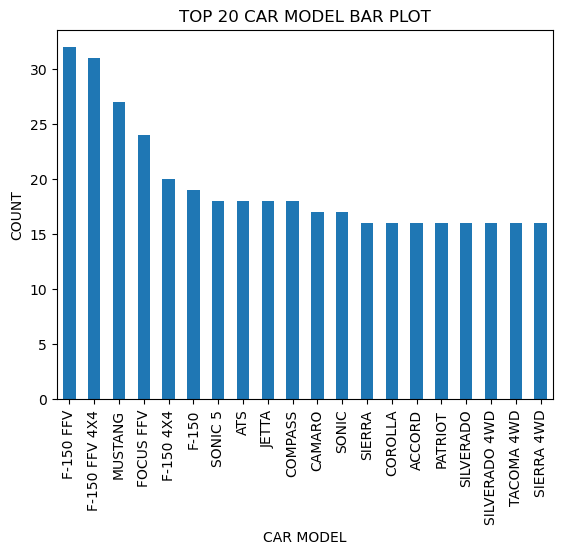

In [16]:
# bar plot of the model column

df['Model'].value_counts()[:20].plot(kind = 'bar')
plt.xlabel('CAR MODEL')
plt.ylabel('COUNT')
plt.title('TOP 20 CAR MODEL BAR PLOT')
plt.show()

In [17]:
# grouping the the data by top 10 vehicle class and the sum of produced CO2 
car_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).head(10)
car_class

Vehicle Class
VAN - PASSENGER             397.212121
VAN - CARGO                 361.500000
SUV - STANDARD              306.730832
PICKUP TRUCK - STANDARD     301.610526
TWO-SEATER                  282.086614
PICKUP TRUCK - SMALL        277.022556
FULL-SIZE                   264.407480
MINIVAN                     261.114754
SUBCOMPACT                  244.568480
STATION WAGON - MID-SIZE    240.755556
Name: CO2 Emissions(g/km), dtype: float64

Text(0.5, 1.0, 'Average CO2 produced by Vehicle classes')

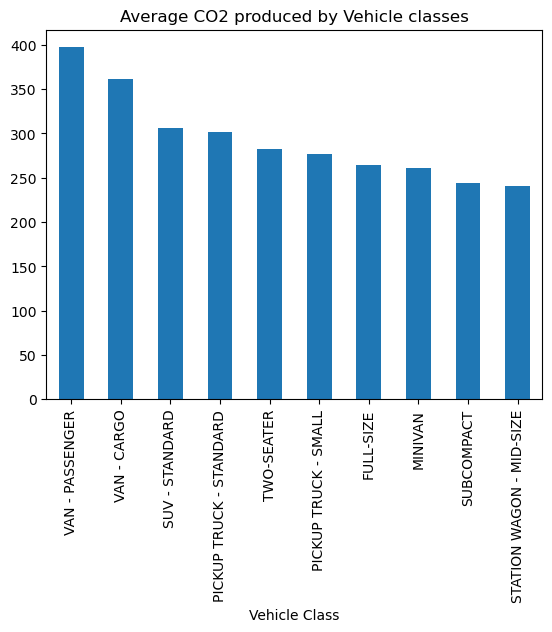

In [18]:
car_class.plot(kind = 'bar')
plt.title('Average CO2 produced by Vehicle classes')

Text(0.5, 1.0, 'AVERAGE CO2 PRODUCED BY EACH FUEL TYPE')

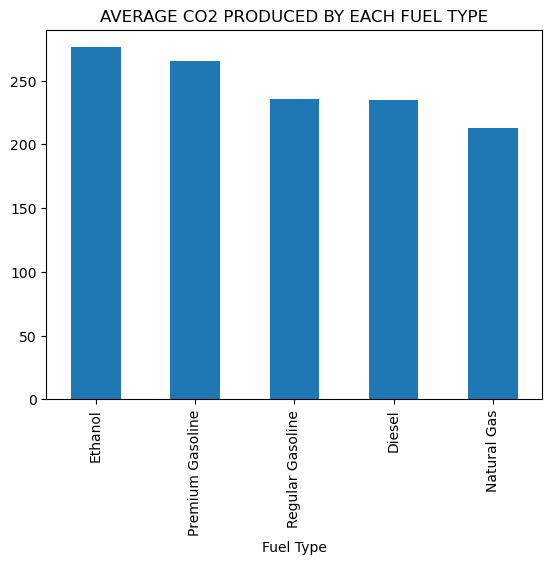

In [19]:
# Group and calculate MEAN CO2 emissions by fuel type, then sort in descending order
fuel_type_emissions = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)
fuel_type_emissions.plot(kind = 'bar')
plt.title('AVERAGE CO2 PRODUCED BY EACH FUEL TYPE')

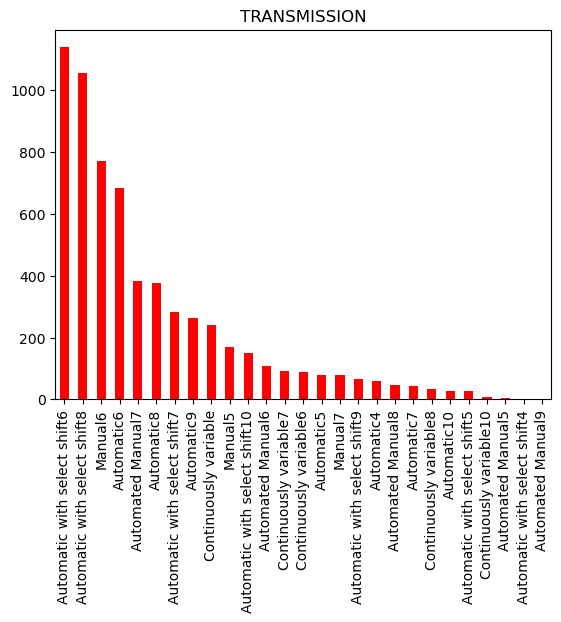

In [20]:
# Transmission bar plot

df['Transmission'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('TRANSMISSION', color = 'black')
plt.show()

# Label Encoding

In [21]:
encoder = LabelEncoder()

In [22]:
df['Model'] = df['Model'].astype(str) # since it contains int and str, all values are converted to str/object dtype

In [23]:
# converting all the string data types to numeric or int dtype

df['Make'] = encoder.fit_transform(df['Make'])
df['Model'] = encoder.fit_transform(df['Model'])
df['Vehicle Class'] = encoder.fit_transform(df['Vehicle Class'])
df['Transmission'] = encoder.fit_transform(df['Transmission'])
df['Fuel Type'] = encoder.fit_transform(df['Fuel Type'])

In [24]:
df # reviewing the dataset

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0   1057              0             2.0          4             7   
1        0   1057              0             2.4          4            25   
2        0   1058              0             1.5          4            22   
3        0   1233             11             3.5          6             8   
4        0   1499             11             3.5          6             8   
...    ...    ...            ...             ...        ...           ...   
6277    41   1951             11             2.0          4            10   
6278    41   1957             11             2.0          4            10   
6279    41   1960             11             2.0          4            10   
6280    41   1968             12             2.0          4            10   
6281    41   1969             12             2.0          4            10   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0             3                               9.9   
1             3                              11.2   
2             3                               6.0   
3             3                              12.7   
4             3                              12.1   
...         ...                               ...   
6277          3                              10.7   
6278          3                              11.2   
6279          3                              11.7   
6280          3                              11.2   
6281          3                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
6277                              7.7                               9.4   
6278                              8.3                               9.9   
6279                              8.6                              10.3   
6280                              8.3                               9.9   
6281                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
6277                           30                  219  
6278                           29                  232  
6279                           27                  240  
6280                           29                  232  
6281                           26                  248  

[6282 rows x 12 columns]

In [25]:
df.describe() # statistics of the fields or the columns 

Make        Model  Vehicle Class  Engine Size(L)    Cylinders  \
count  6282.000000  6282.000000    6282.000000     6282.000000  6282.000000   
mean     19.466412  1023.105858       6.335403        3.161812     5.618911   
std      11.438736   577.519038       4.828079        1.365201     1.846250   
min       0.000000     0.000000       0.000000        0.900000     3.000000   
25%       9.000000   532.000000       2.000000        2.000000     4.000000   
50%      17.000000   991.000000       6.000000        3.000000     6.000000   
75%      29.000000  1525.000000      11.000000        3.700000     6.000000   
max      41.000000  2052.000000      15.000000        8.400000    16.000000   

       Transmission    Fuel Type  Fuel Consumption City (L/100 km)  \
count   6282.000000  6282.000000                       6282.000000   
mean      13.380930     3.308341                         12.610220   
std        6.978821     0.899835                          3.553066   
min        0.000000     0.000000                          4.200000   
25%        8.000000     3.000000                         10.100000   
50%       10.000000     3.000000                         12.100000   
75%       18.000000     4.000000                         14.700000   
max       26.000000     4.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      6282.000000                       6282.000000   
mean                          9.070583                         11.017876   
std                           2.278884                          2.946876   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.300000                         12.700000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  6282.000000          6282.000000  
mean                     27.411016           251.157752  
std                       7.245318            59.290426  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           289.000000  
max                      69.000000           522.000000

In [26]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

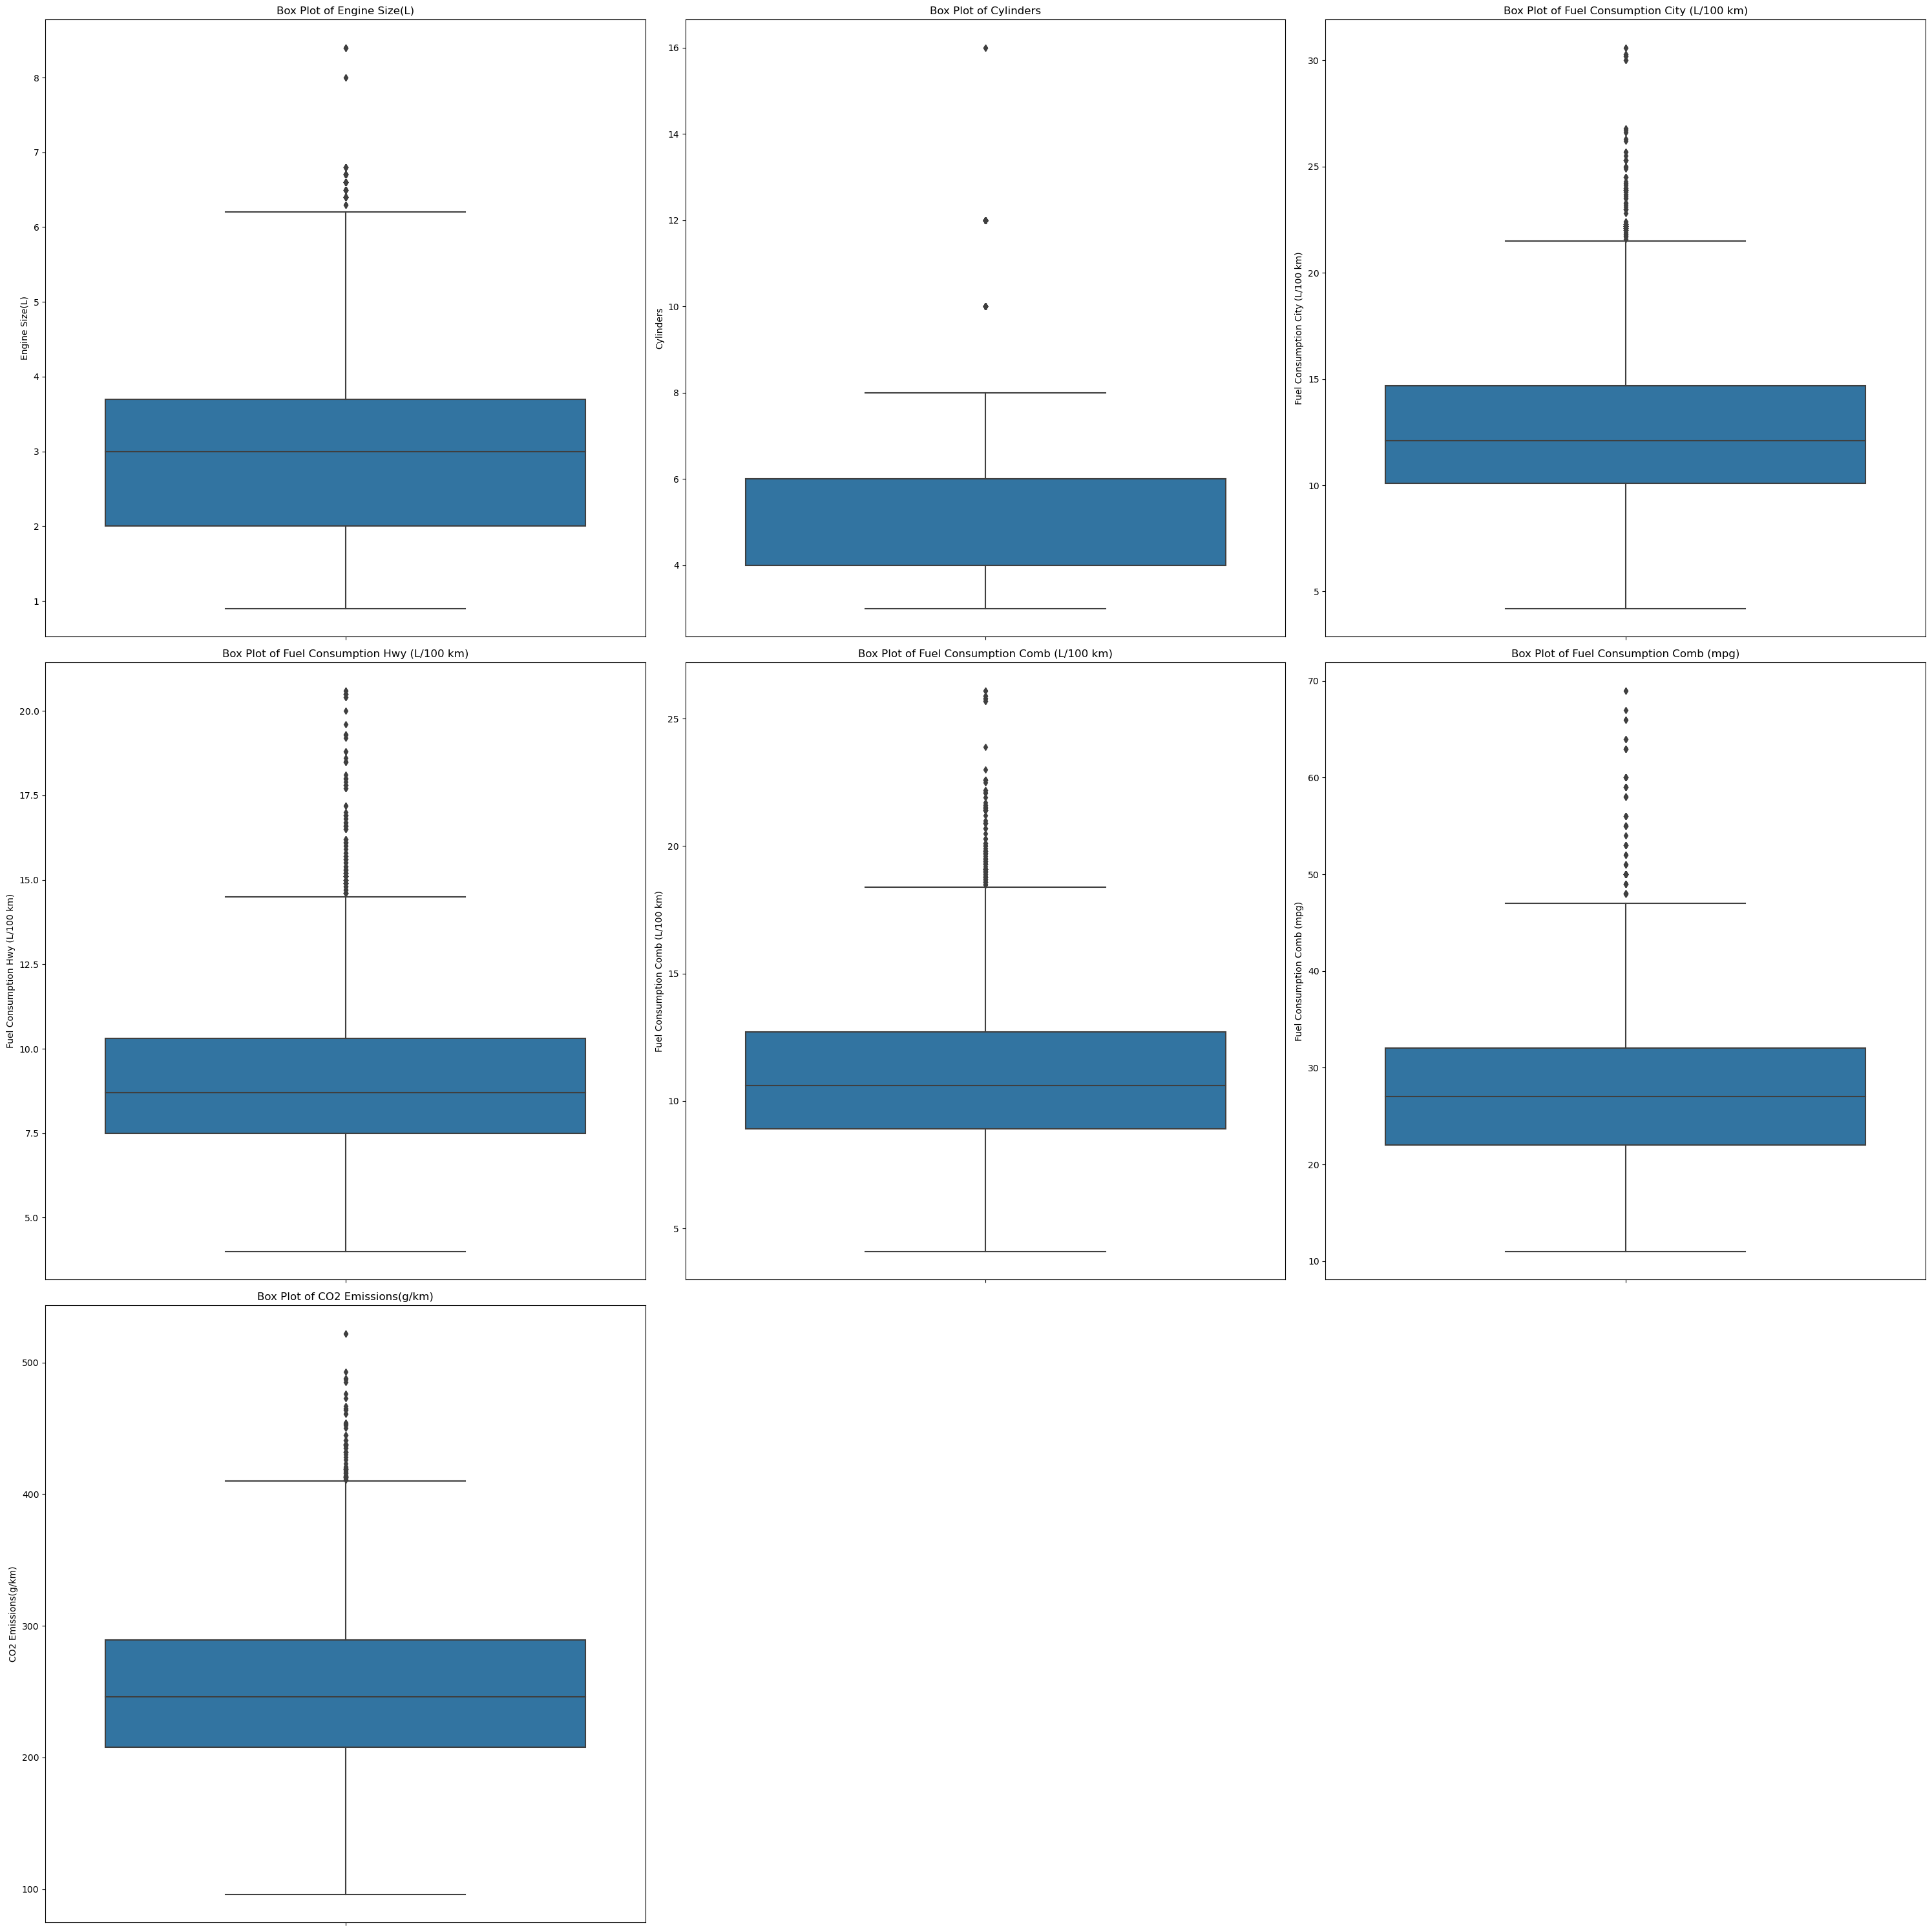

In [27]:
# Box plots for numerical columns

plt.figure(figsize=(30, 30))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

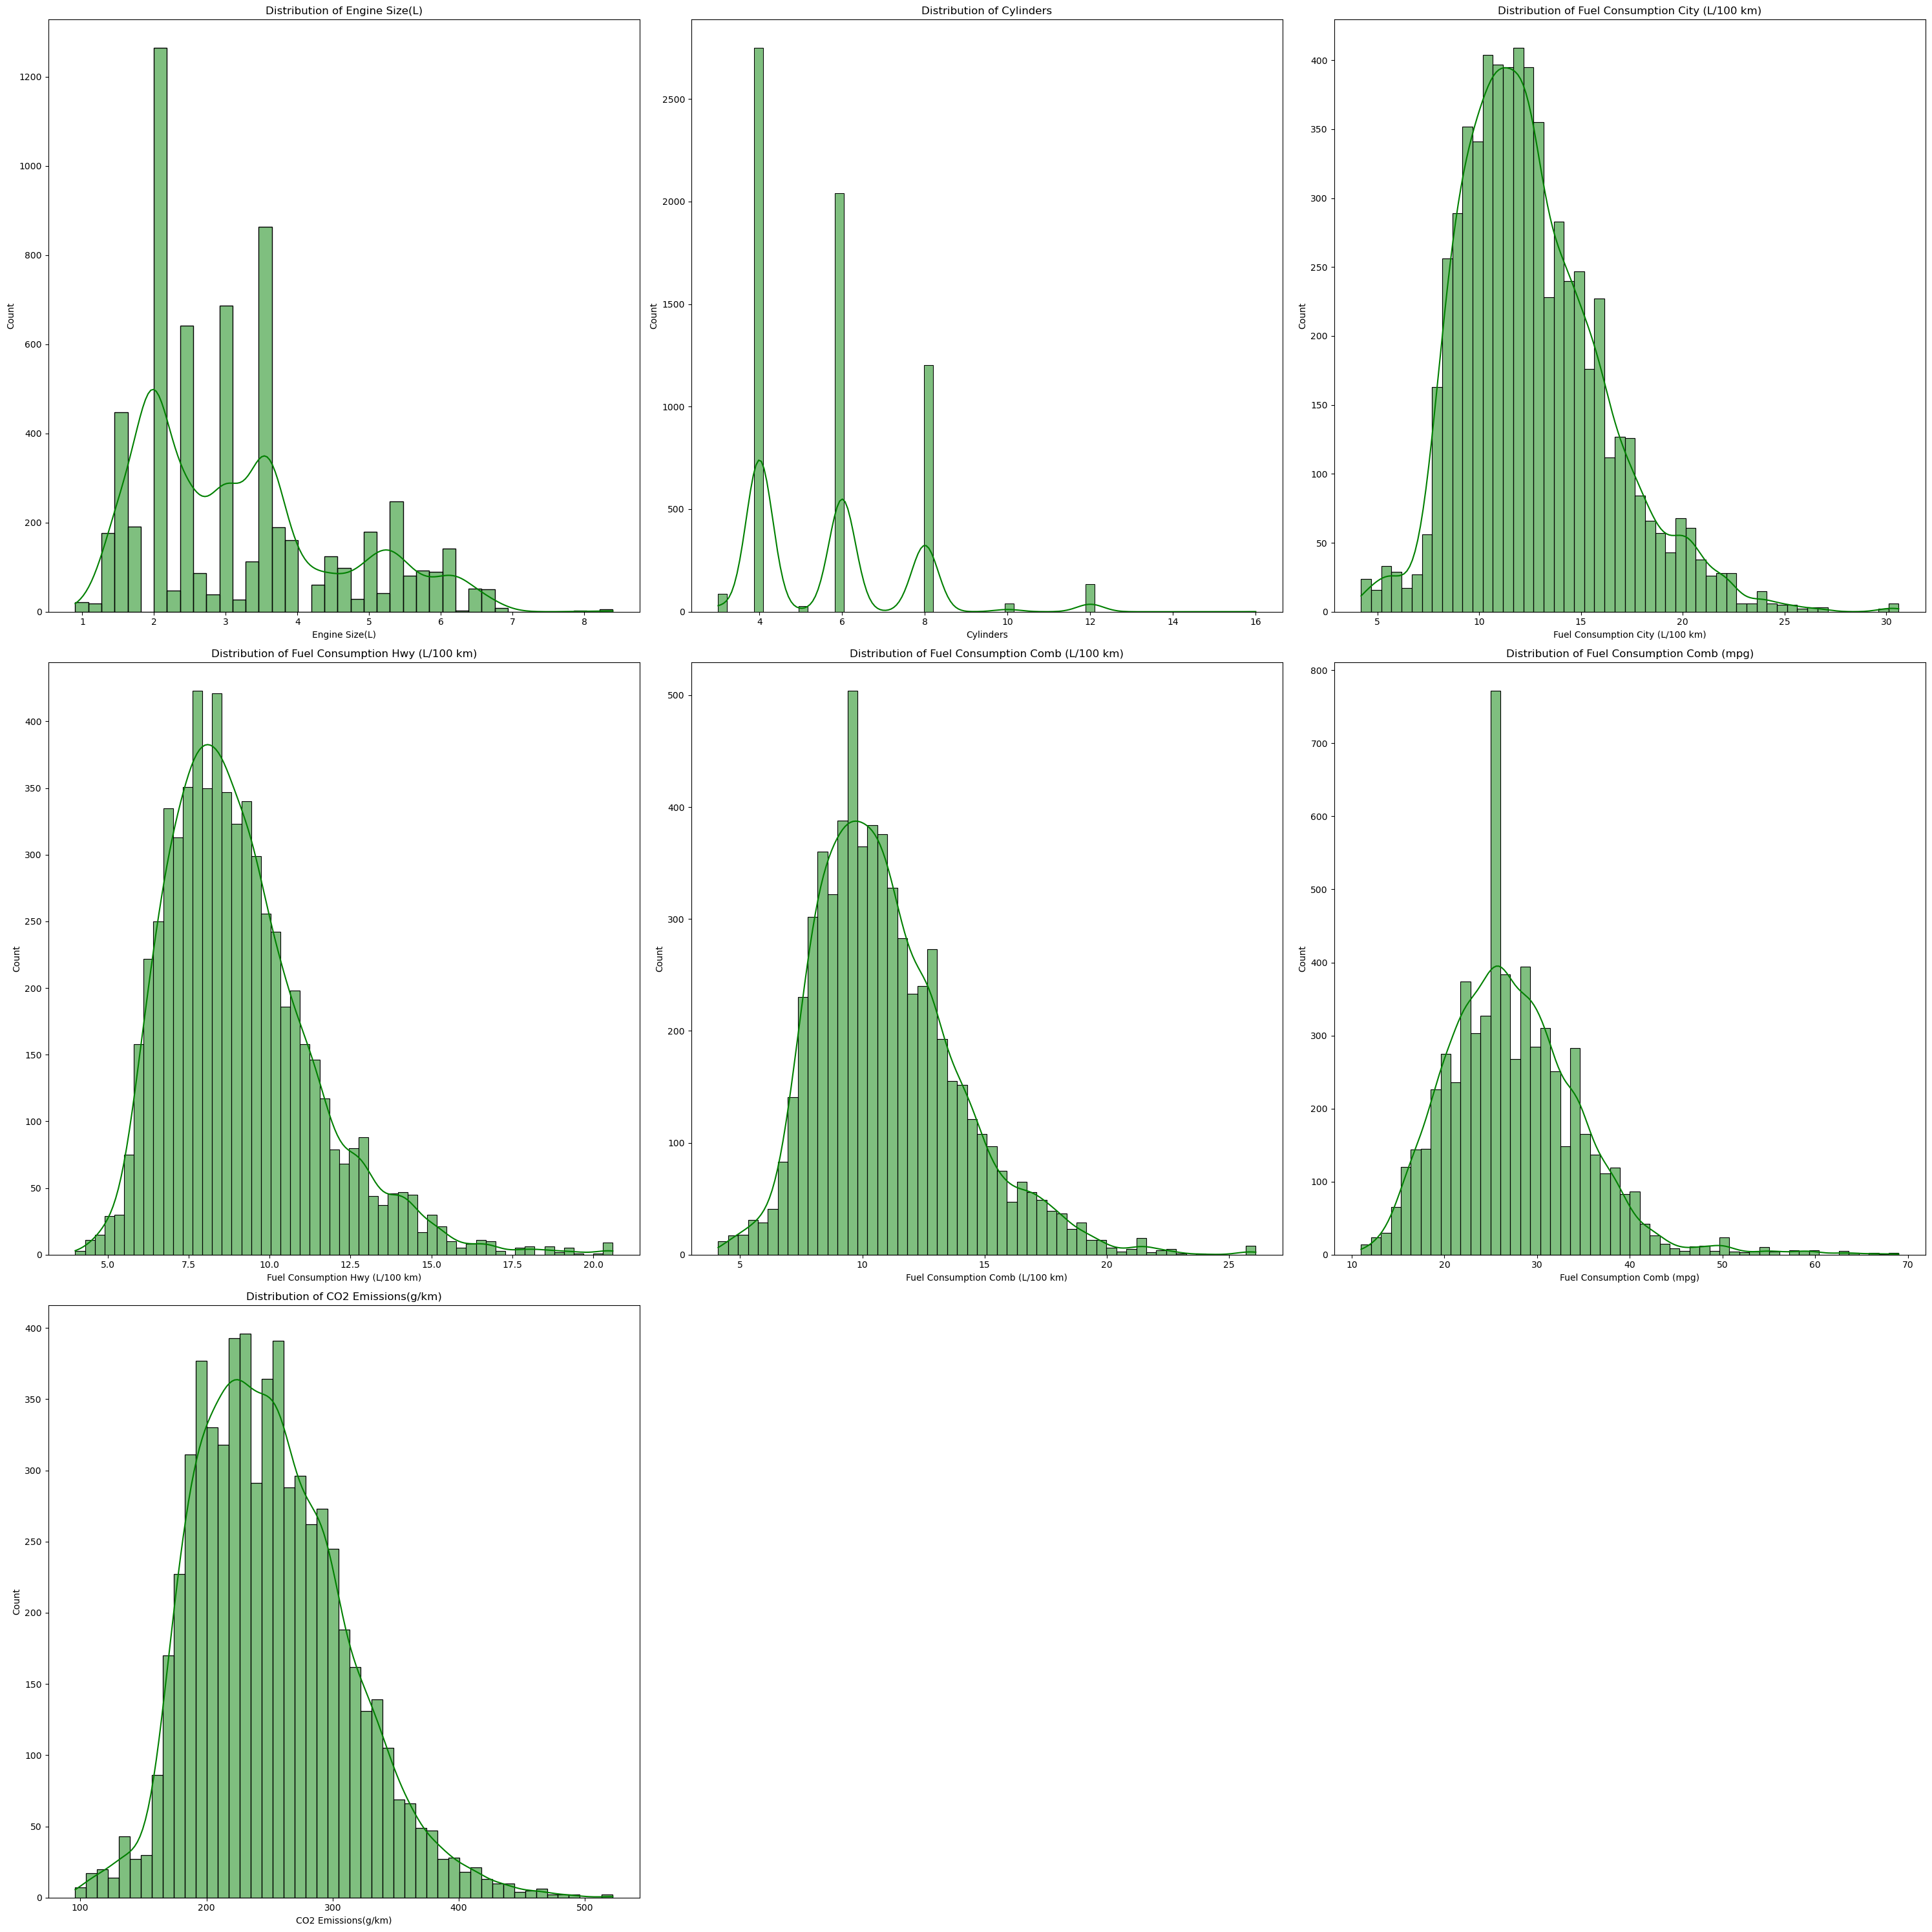

In [28]:
# Histograms for numerical columns to show values distribution

plt.figure(figsize=(30, 30))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color = 'g')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

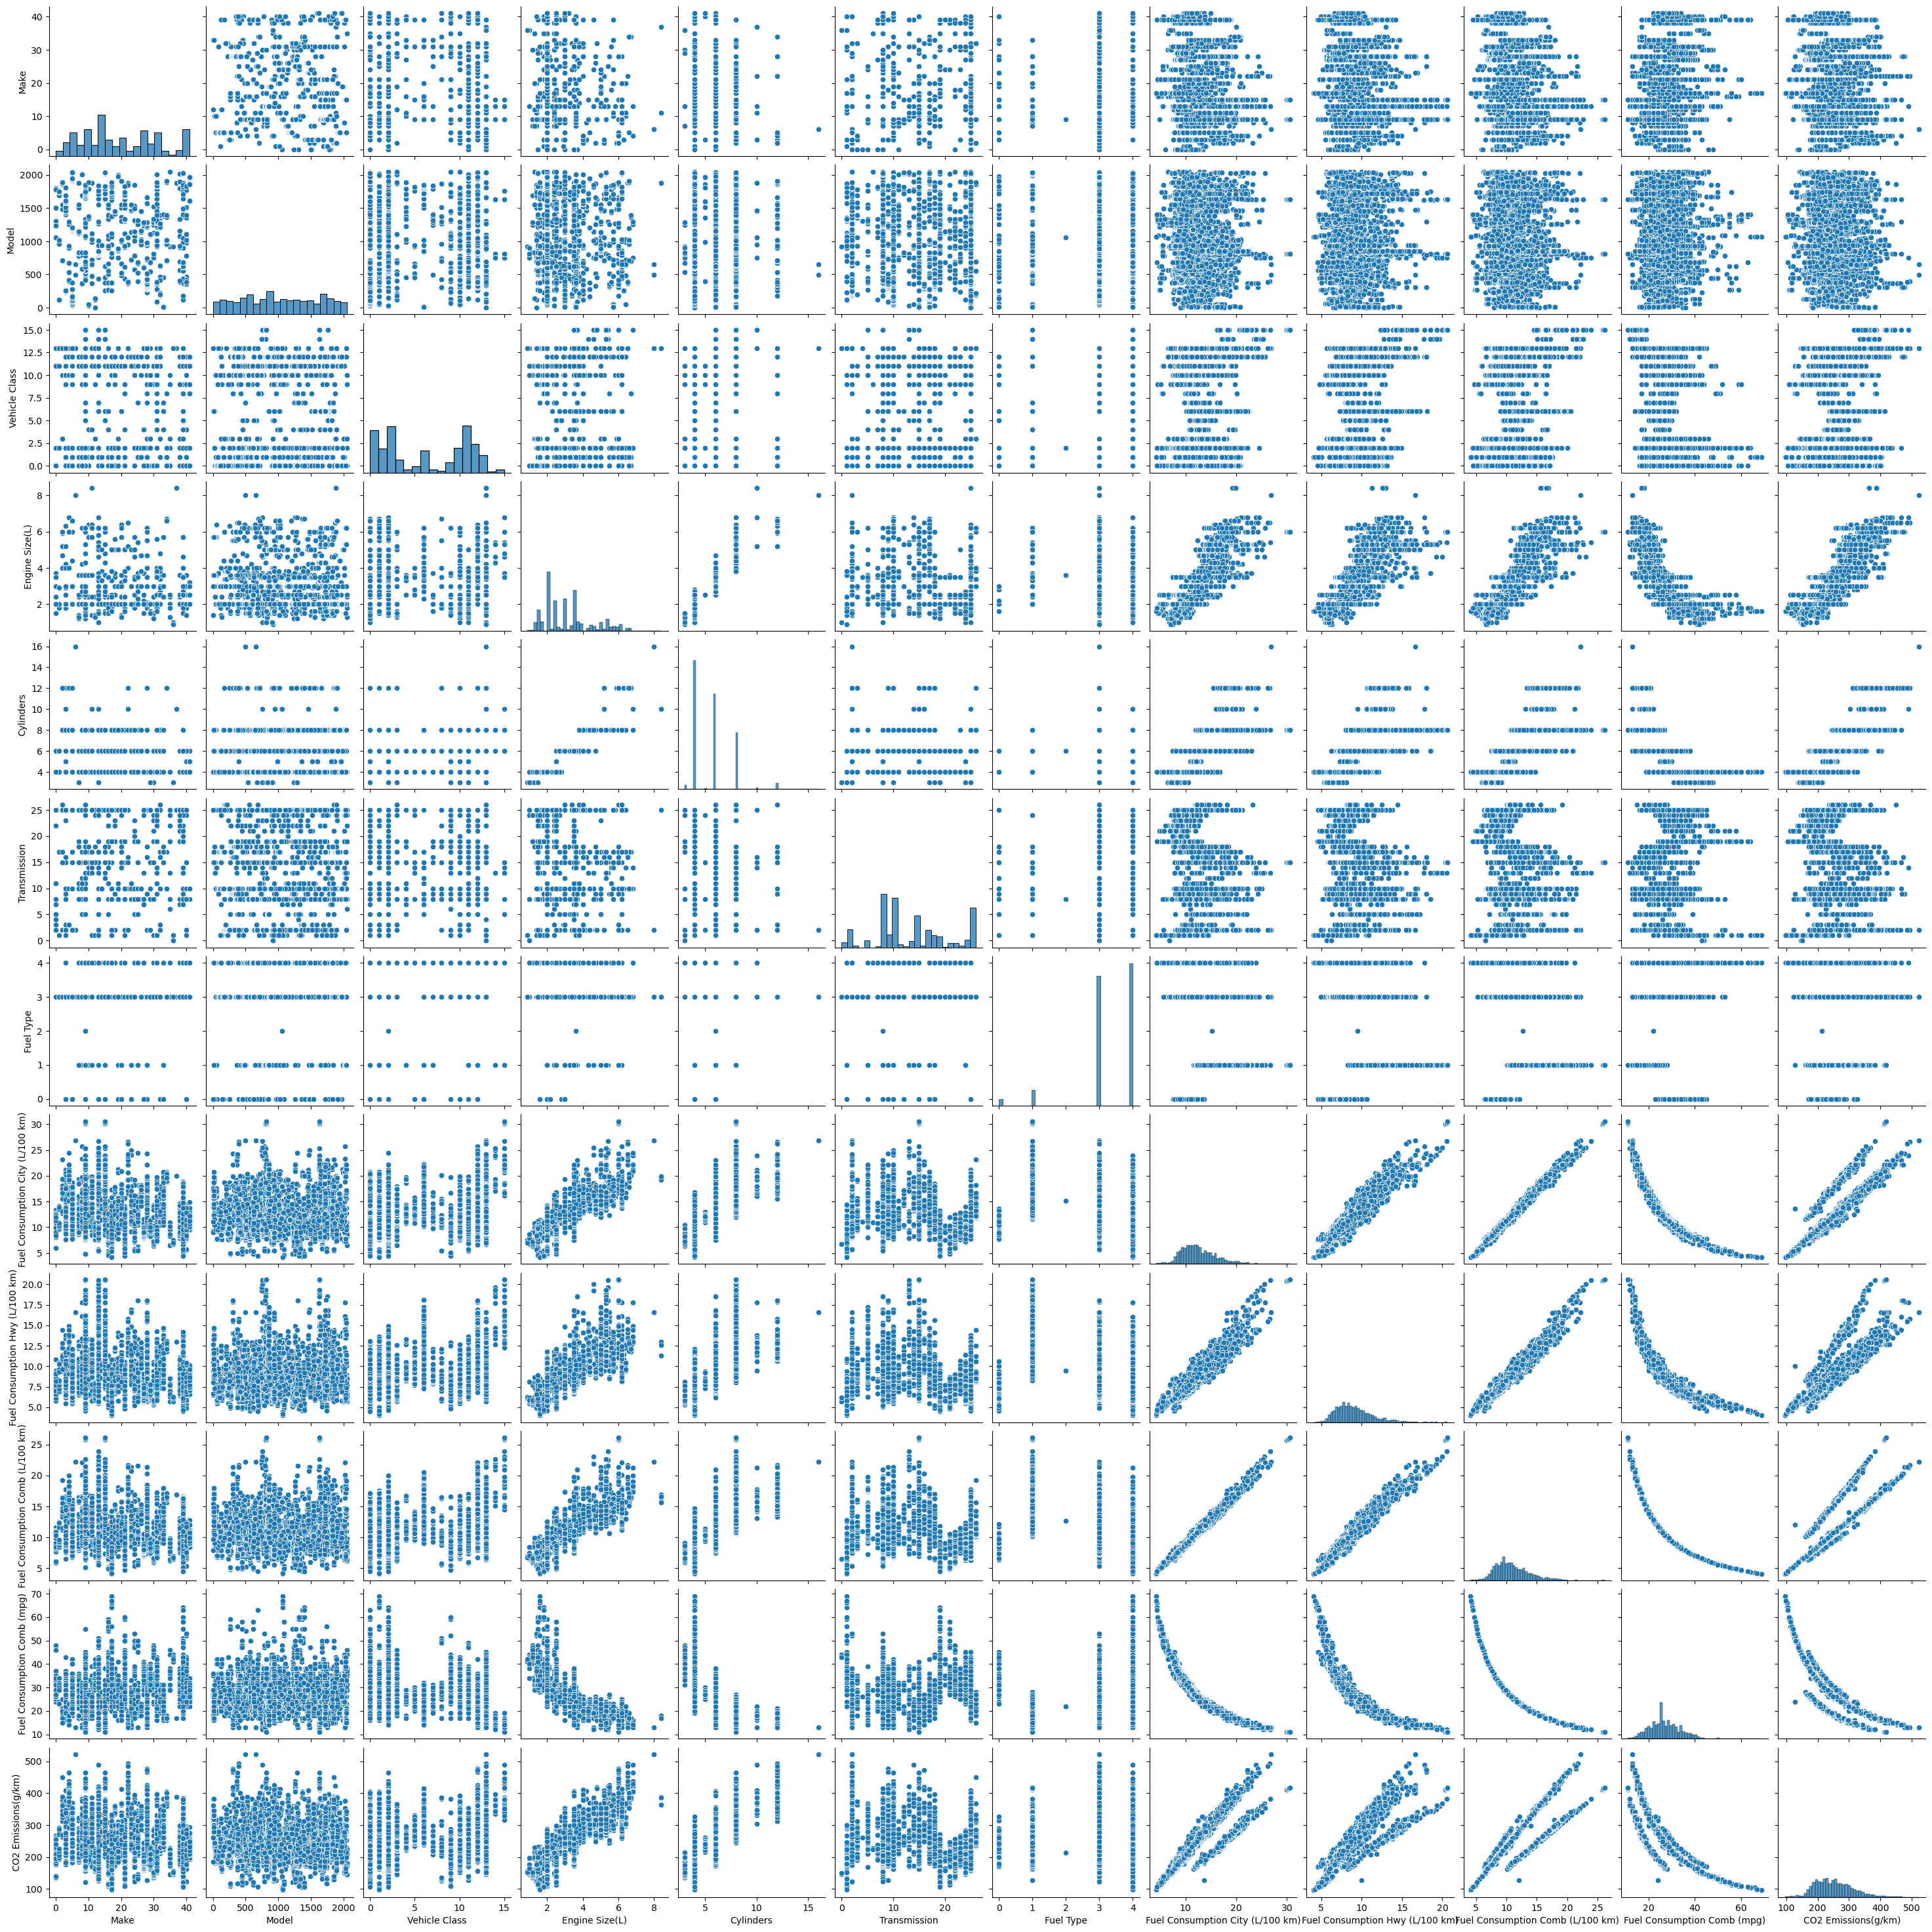

In [29]:
# pairplot to show relationship between fields
sns.pairplot(df) 
plt.show()

<Figure size 2500x1000 with 0 Axes>

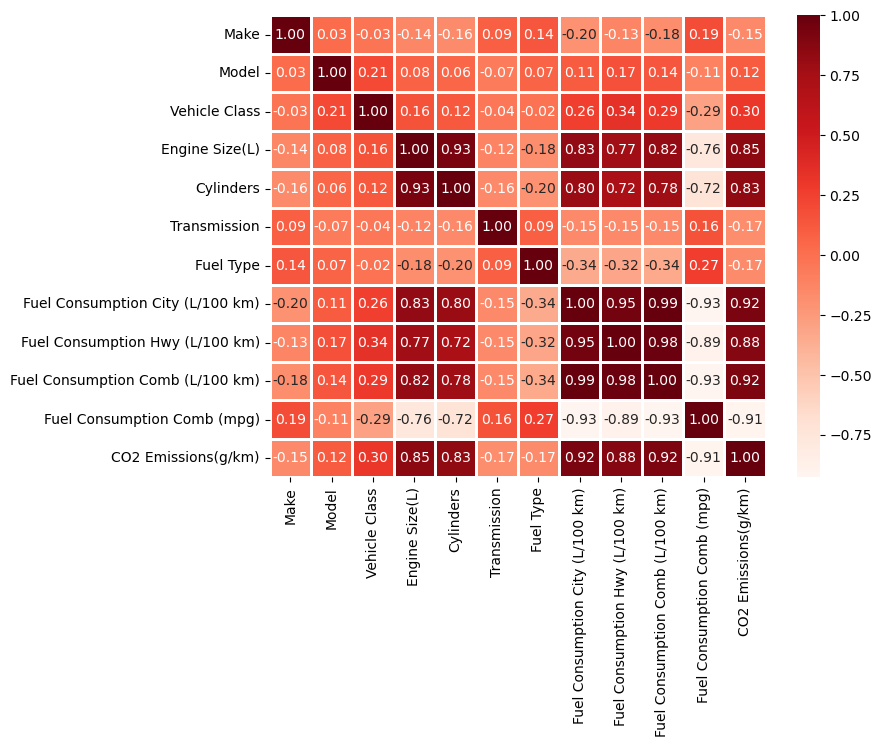

In [30]:
# heatmap to show fields or columns correlation with each other
plt.figure(figsize = (25, 10))
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True,linewidth = 1,fmt='.2f', cmap = 'Reds')
plt.show()

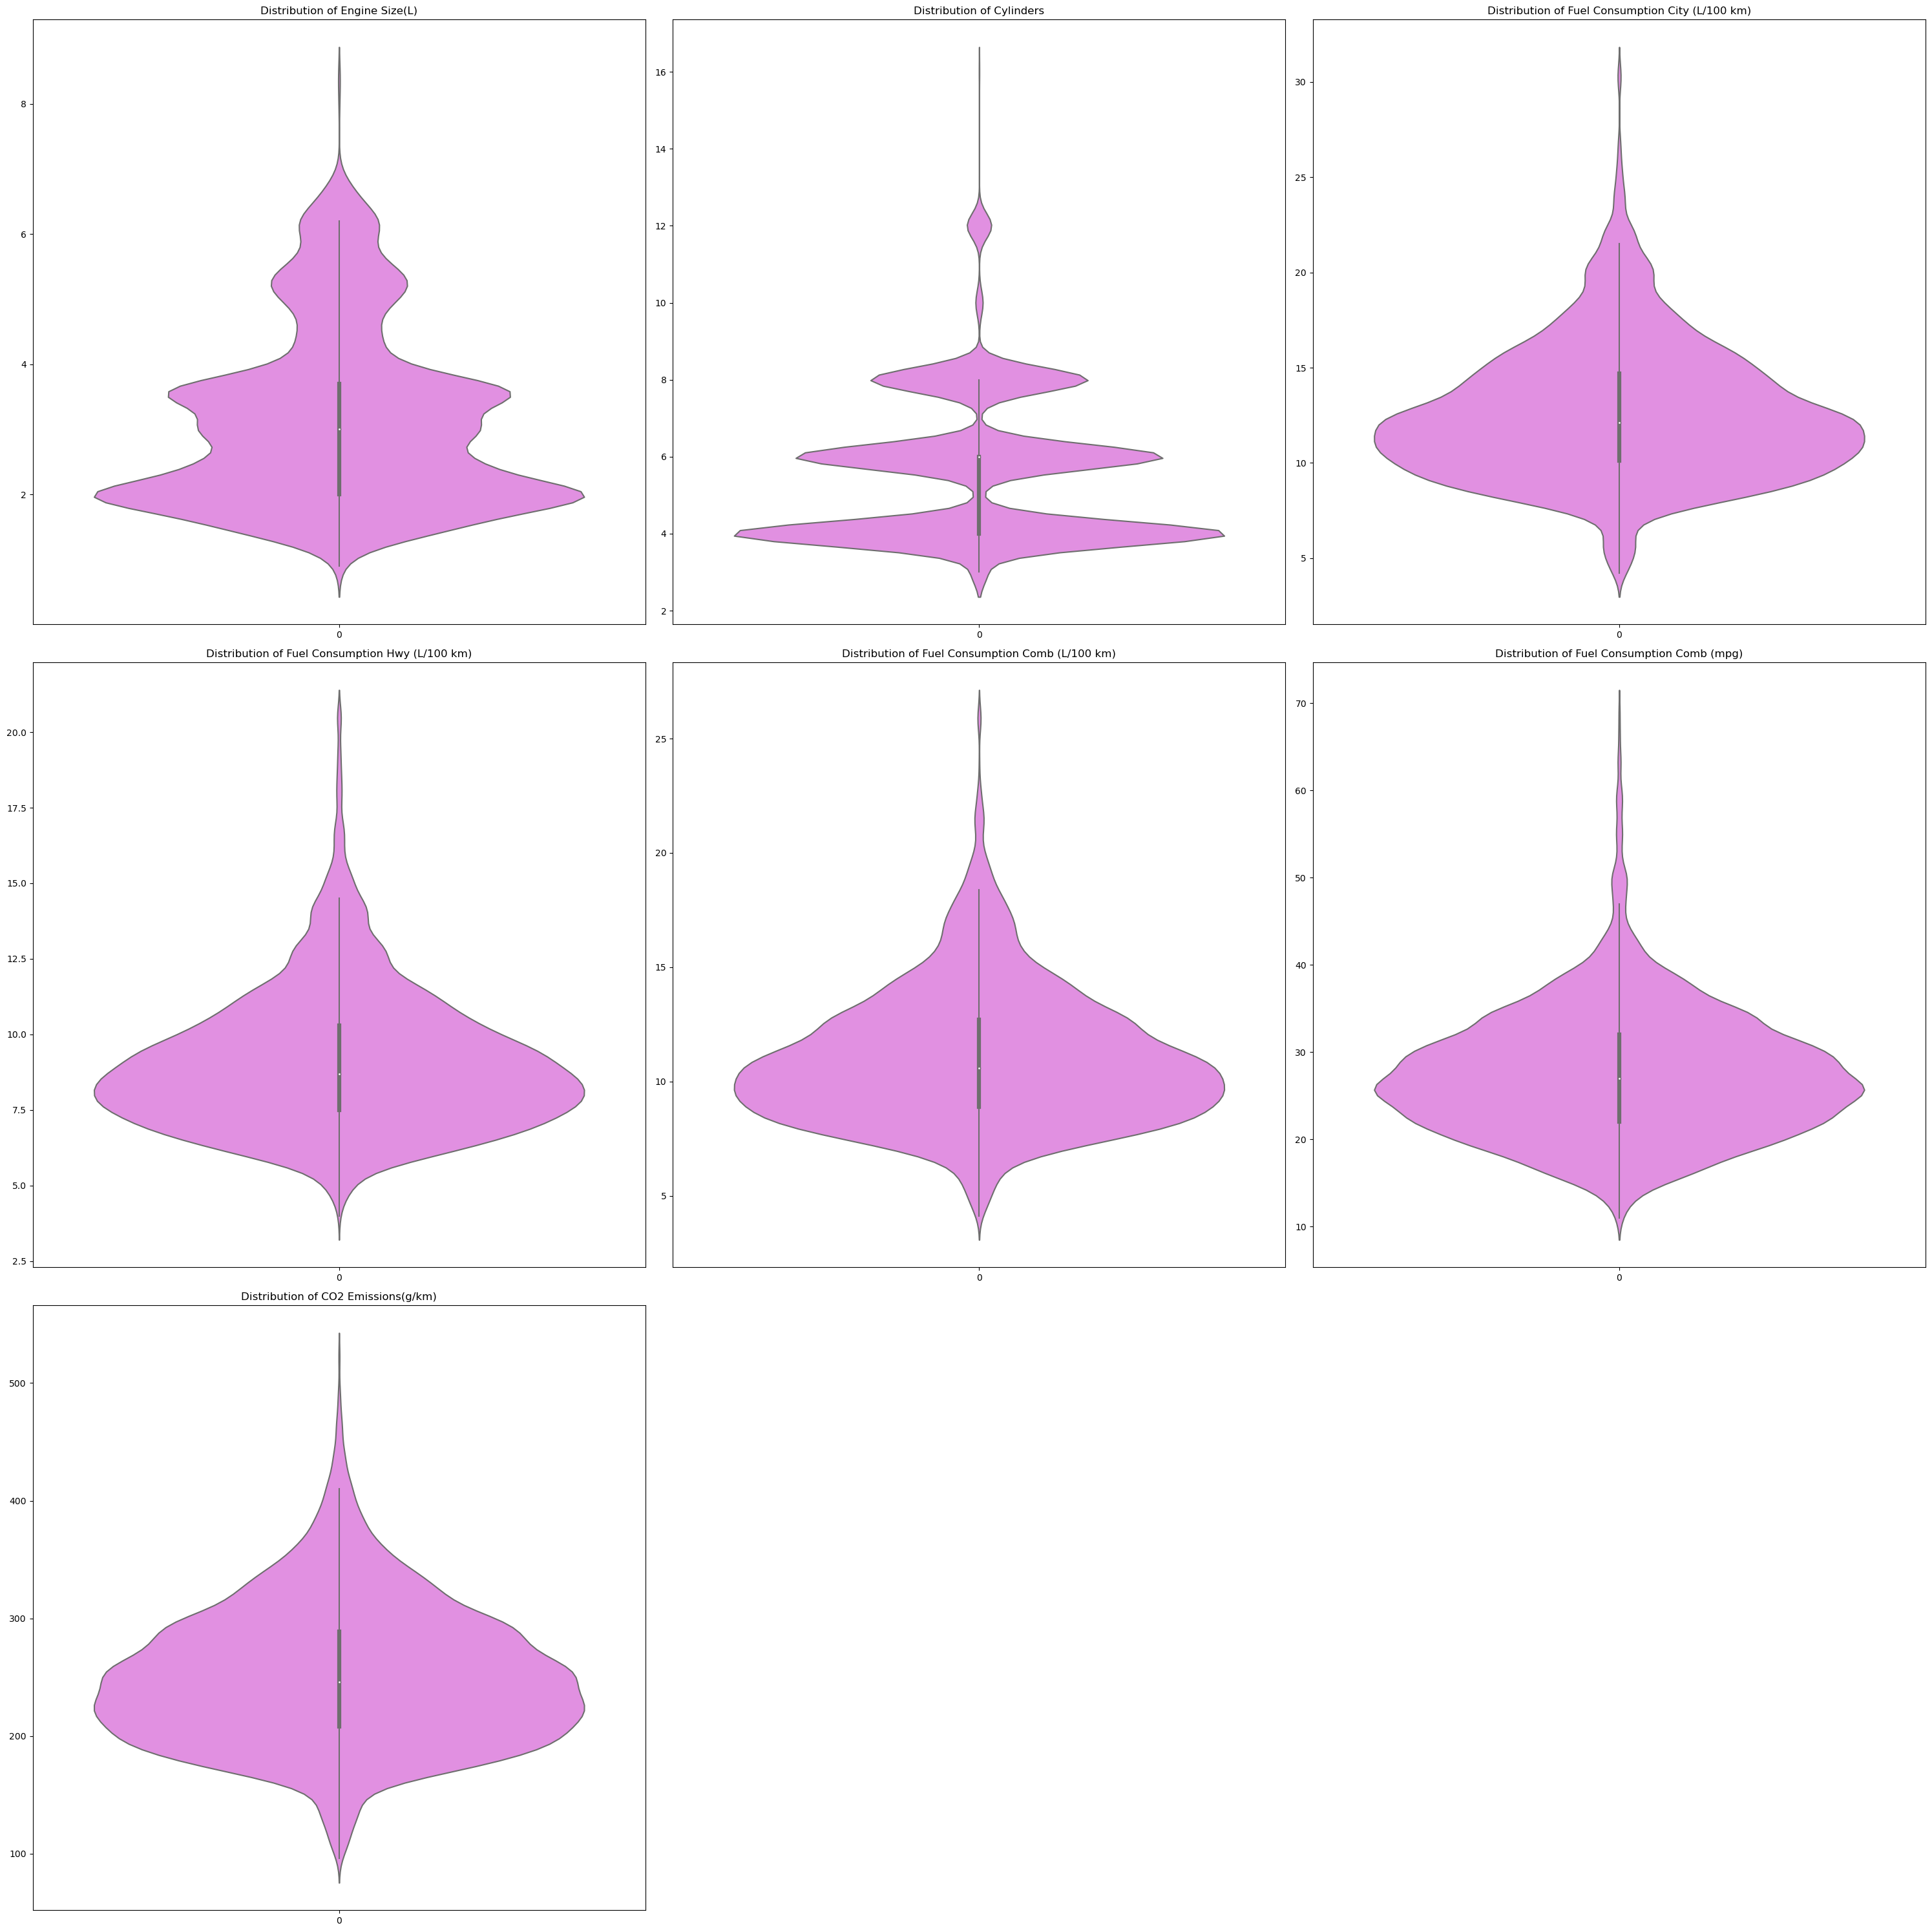

In [31]:
# violinplot to show distribution and density of values in columns 

plt.figure(figsize=(30, 30))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(df[col], kde=True, color = 'violet')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

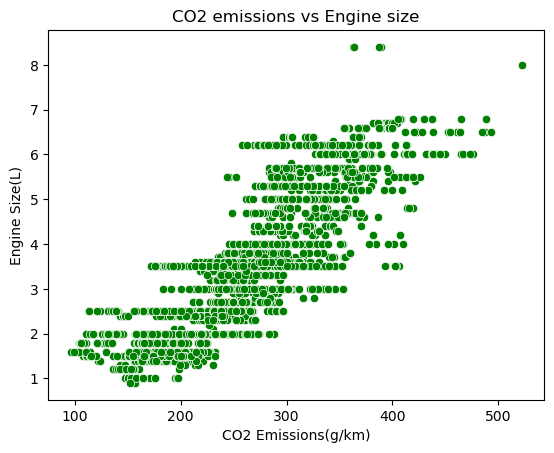

In [32]:
# scatter plot to show how engine size contributes to CO2 emissions 

sns.scatterplot(x = df['CO2 Emissions(g/km)'], y = df['Engine Size(L)'], color ='green')
plt.title('CO2 emissions vs Engine size')
plt.show()

# MODEL CONSTRUCTION

In [33]:
# splitting data data into dependent and independent variable 

x = df[['Make','Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']] # independent

y = df['CO2 Emissions(g/km)'] # dependent

In [34]:
# standard scalling the independent columns to have a common scale
scaler = MinMaxScaler(feature_range=(0, 1))

In [35]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=30)

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train[:5] # viewing the top 5 rows of the X_train

array([[0.95121951, 0.50389864, 0.8       , 0.34666667, 0.23076923,
        0.38461538, 1.        , 0.29924242, 0.30120482, 0.29545455,
        0.27586207],
       [0.31707317, 0.41617934, 0.4       , 0.54666667, 0.38461538,
        0.30769231, 0.25      , 0.65530303, 0.6686747 , 0.65909091,
        0.06896552],
       [0.75609756, 0.68031189, 0.73333333, 0.34666667, 0.23076923,
        0.73076923, 1.        , 0.29924242, 0.29518072, 0.3       ,
        0.25862069],
       [0.3902439 , 0.24317739, 0.06666667, 0.08      , 0.07692308,
        0.96153846, 0.75      , 0.14393939, 0.13253012, 0.14090909,
        0.48275862],
       [0.73170732, 0.65302144, 0.73333333, 0.2       , 0.07692308,
        0.80769231, 1.        , 0.21590909, 0.24698795, 0.22727273,
        0.34482759]])

In [38]:
X_test[:5] # viewing the top 5 rows of the X_test

array([[0.97560976, 0.52923977, 0.        , 0.12      , 0.07692308,
        0.03846154, 1.        , 0.1969697 , 0.1686747 , 0.18636364,
        0.39655172],
       [0.26829268, 0.34844055, 0.8       , 0.73333333, 0.38461538,
        0.65384615, 0.75      , 0.53409091, 0.4939759 , 0.52272727,
        0.12068966],
       [0.51219512, 0.63791423, 0.6       , 0.09333333, 0.07692308,
        0.03846154, 1.        , 0.03409091, 0.10843373, 0.05909091,
        0.70689655],
       [0.68292683, 0.14961014, 0.8       , 0.41333333, 0.38461538,
        0.69230769, 0.75      , 0.52651515, 0.69879518, 0.58636364,
        0.10344828],
       [0.68292683, 0.36208577, 0.66666667, 0.50666667, 0.38461538,
        0.34615385, 0.75      , 0.35984848, 0.31325301, 0.34545455,
        0.22413793]])

In [39]:
y_train[:5] # viewing the top 5 rows of the y_train

4021    251
3441    305
5542    250
3558    167
5516    212
Name: CO2 Emissions(g/km), dtype: int64

In [40]:
y_test[:5] # viewing the top 5 rows of the y_test

4063    193
4294    363
3685    129
5430    396
2791    275
Name: CO2 Emissions(g/km), dtype: int64

# LINEAR REGRESSION

In [41]:
lr_model = LinearRegression() # constructing the linear regression model

In [42]:
lr_model.fit(X_train, y_train) # fitting the training datasets to the model for training the algorithm

LinearRegression()

In [43]:
# showing the coefficients and intercept of the model

print('computed model coefficients =  ', lr_model.coef_)
print('\ncomputed model intercept =  ', lr_model.intercept_)

computed model coefficients =   [   4.09361579   -2.88522142   11.19413812   25.73143947   98.09727266
   -4.59859768   29.59315598   65.09649744   28.63434547   70.8432001
 -165.35633895]

computed model intercept =   191.3800837399467


In [44]:
# using the algorithm to predict values

y_pred = lr_model.predict(X_test) 
y_pred

array([199.17906701, 342.20288481, 130.33709586, ..., 205.02422519,
       175.8532499 , 287.33411314])

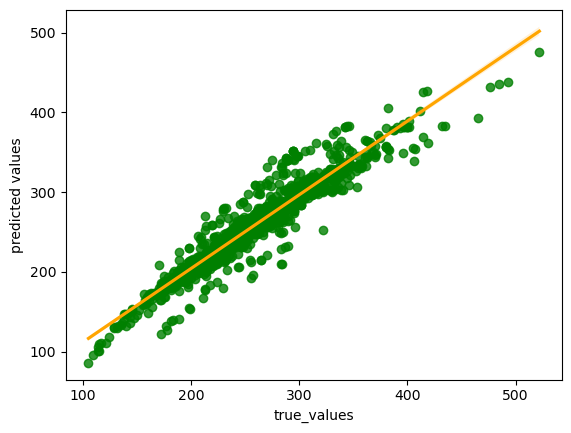

In [45]:
# visualization of the correlation between the actual and predicted dependent values

sns.regplot(x = y_test, y = y_pred, color = 'g', line_kws = {"color":'orange'})
plt.xlabel('true_values', color = 'black')
plt.ylabel('predicted values', color = 'black')
plt.show()

# model's metrics

In [46]:
# displaying metrics about the linear regression algorithm on the dataset

lrr2_score = r2_score(y_test, y_pred) * 100
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f"r2_score: {round(lrr2_score, 4)} %\n\nMean Squared Error: {round(MSE, 4)}\n\nmean absolute error:{MAE}")

r2_score: 91.14 %

Mean Squared Error: 304.874

mean absolute error:11.827679102193075


# RANDOM FOREST REGRESSOR

In [47]:
rf_model = RandomForestRegressor() # constructing the random forest regressor model

In [48]:
rf_model.fit(X_train, y_train) # fitting the training datasets to the model for training the algorithm

RandomForestRegressor()

In [49]:
# using the algorithm to predict values

rf_pred = rf_model.predict(X_test) 
rf_pred

array([191.115, 362.08 , 127.47 , ..., 190.655, 172.355, 271.   ])

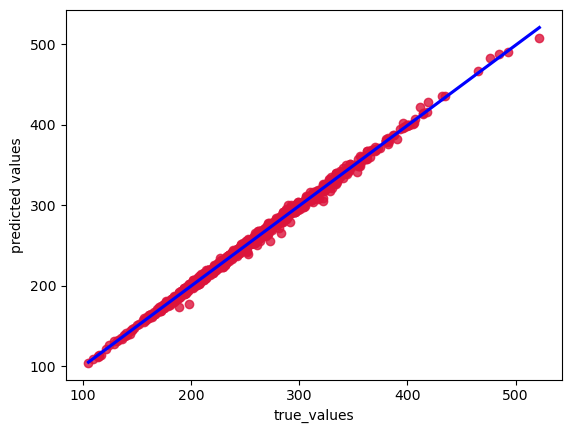

In [50]:
# visualization of the correlation between the actual and predicted dependent values

sns.regplot(x = y_test, y = rf_pred, color = 'crimson', line_kws = {"color":'blue'})
plt.xlabel('true_values', color = 'black')
plt.ylabel('predicted values', color = 'black')
plt.show()

# model's metrics

In [51]:
# displaying metrics about the linear regression algorithm on the dataset

r_score = r2_score(y_test, rf_pred) * 100
rfMSE = mean_squared_error(y_test, rf_pred)
rfMAE = mean_absolute_error(y_test, rf_pred)

print(f"r2_score: {round(r_score, 4)}\n\nMean Squared Error: {round(rfMSE, 4)}\n\nmean absolute error:{rfMAE}")

r2_score: 99.74

Mean Squared Error: 8.9482

mean absolute error:2.0673285695344163


# DECISION TREE REGRESSOR

In [52]:
dt_model = DecisionTreeRegressor() # constructing the decision tree regressor model

In [53]:
dt_model.fit(X_train, y_train) # fitting the training datasets to the model for training the algorithm

DecisionTreeRegressor()

In [54]:
# using the algorithm to predict values

dt_pred = dt_model.predict(X_test)
dt_pred

array([189., 363., 129., ..., 190., 173., 273.])

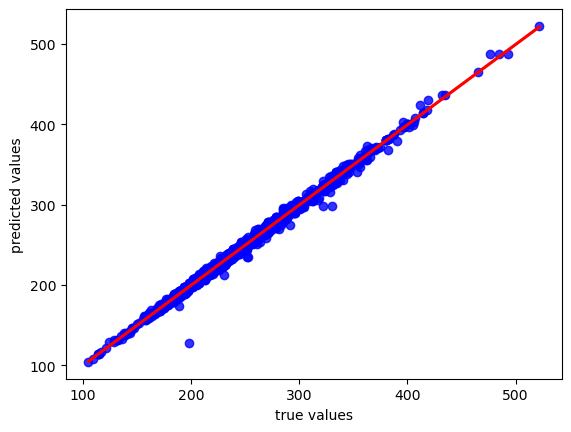

In [55]:
# visualization of the correlation between the actual and predicted dependent values

sns.regplot(x = y_test, y = dt_pred, color = 'blue', line_kws = {"color":'red'})
plt.xlabel('true values', color = 'black')
plt.ylabel('predicted values', color = 'black')
plt.show()

# model metrics

In [56]:
# displaying metrics about the linear regression algorithm on the dataset

dt_MSE = mean_squared_error(y_test, dt_pred)
r_score1 = r2_score(y_test, dt_pred) * 100
dtMAE = mean_absolute_error(y_test, dt_pred)

print(f"r2_score: {round(r_score1, 4)}\n\nMean Squared Error: {round(dt_MSE, 4)}\n\nmean absolute error:{dtMAE}")

r2_score: 99.5265

Mean Squared Error: 16.2919

mean absolute error:2.184831609652612


In [57]:
# models and their metrics 
metrics = pd.DataFrame({'models':['linear regression','randon forest', 'decision tree'],\
                        'R2 score':[lrr2_score,r_score,r_score1],\
                       'mean squared error':[MSE, rfMSE, dt_MSE],\
                       'mean absolute error':[MAE, rfMAE, dtMAE]})
metrics

models   R2 score  mean squared error  mean absolute error
0  linear regression  91.140025          304.874013            11.827679
1      randon forest  99.739955            8.948224             2.067329
2      decision tree  99.526540           16.291877             2.184832